## КМ3 


1) Рассмотрите электрическую схему, состоящую из источника ЭДС (E), резистора и нелинейного элемента NE, заданного вольт-амперной характеристикой (ВАХ): 𝑖𝑁𝐸=𝑢𝑁𝐸^3, где 𝑖𝑁𝐸, 𝑢𝑁𝐸 – ток и напряжение на нелинейном элементе. Резистор и нелинейный элемент включены параллельно друг другу. В свою очередь они подключены к источнику ЭДС. 𝐸(𝑡)=𝑥∗𝑠𝑖𝑛(𝑡). Напишите функцию для вычисления токов на резисторе и нелинейном элементе.

2) Постройте зависимости токов на резисторе и нелинейном элементе при R=1 Ом и R=0.2 Ом. Постройте их графики в зависимости от времени от 0 до 10.

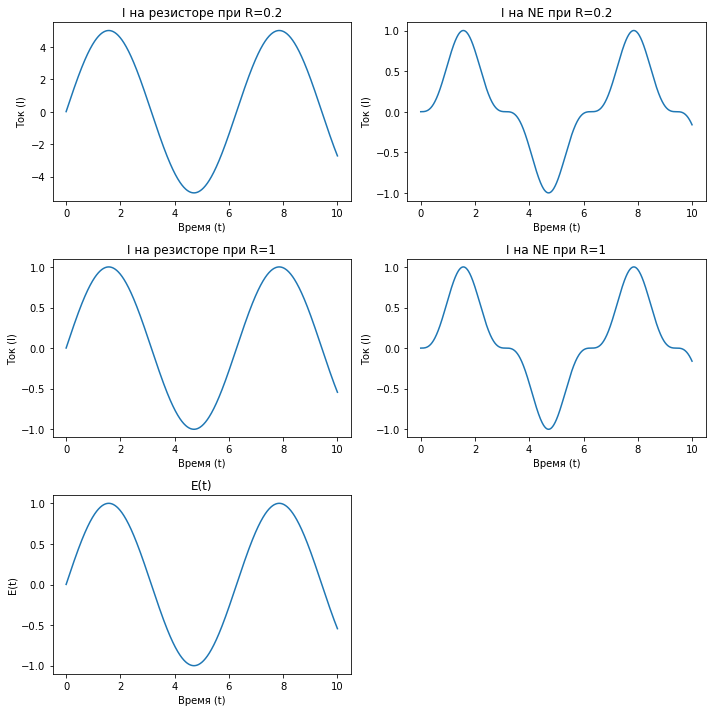

In [4]:
from scipy.optimize import fsolve
from numpy import linspace, sin
import matplotlib.pyplot as plt


def vah(u):
    return u**3

def E(t, x=1):
    return x*sin(t)


def schem(I, r, e):
    #Т.к соедениние ||, то Une = e
    return I - e/((r*e/vah(e))/(r+e/vah(e)))


def current(t, r):
    I = fsolve(schem, 0, args=(r, E(t)))[0]
    return E(t)/r, I-E(t)/r


def draw():
    x = [t for t in list(linspace(0.001, 10, 1000))] #Время
    y1 = [current(t, 0.2) for t in x]
    y1_1 = [i[0] for i in y1] #Ток на резисторе при R=0.2
    y1_2 = [i[1] for i in y1] #Ток на NE при R=0.2
    y2 = [current(t, 1) for t in x]
    y2_1 = [i[0] for i in y2] #Ток на резисторе при R=0.1
    y2_2 = [i[1] for i in y2] #Ток на NE при R=1
    y3 = [E(t) for t in x]


    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(3, 2, 1)
    ax1.set(title='I на резисторе при R=0.2')
    ax2 = fig.add_subplot(3, 2, 2)
    ax2.set(title='I на NE при R=0.2')
    ax3 = fig.add_subplot(3, 2, 3)
    ax3.set(title='I на резисторе при R=1')
    ax4 = fig.add_subplot(3, 2, 4)
    ax4.set(title='I на NE при R=1')
    ax5 = fig.add_subplot(3, 2, 5)
    ax5.set(title='E(t)')
    ax5.set_xlabel('Время (t)')
    ax5.set_ylabel('E(t)')
    for ax in (ax1, ax2, ax3, ax4):
        ax.set_xlabel('Время (t)')
        ax.set_ylabel('Ток (I)')
    ax1.plot(x, y1_1)
    ax2.plot(x, y1_2)
    ax3.plot(x, y2_1)
    ax4.plot(x, y2_2)
    ax5.plot(x, y3)
    plt.tight_layout()
    plt.show()


draw()